In [10]:
import torch
from pathlib import Path
import librosa
import numpy as np


In [ ]:
vocoder = torch.hub.load('descriptinc/melgan-neurips', 'load_melgan')

In [51]:
def to_db(spectrogram, power_spectr = False, min_db = -80):
    scale = 10 if power_spectr else 20
    spec_max = np.max(spectrogram)
    spec_db = np.clip(scale * np.log10(spectrogram / spec_max + 1e-12), a_min=min_db, a_max=0)
    return spec_db


audio_path = Path(r'D:\GitHub_Portfolio\SpeechReconstruction\data\in.wav')
x_wav, sr = librosa.load(audio_path, sr=16000)
x_stft = librosa.stft(y=x_wav, n_fft=1024, hop_length=256)
# melfb = librosa.filters.mel(sr = sr, 
#                             n_fft = 1024, 
#                             n_mels = 80)
# x_mel = np.dot(melfb, np.abs(x_stft))
# x_mel = torch.as_tensor(to_db(x_mel))
# x_mel = (librosa.feature.melspectrogram(y=x_wav, n_fft=1024, n_mels=80))
# .unsqueeze(0)
x_mel = vocoder(torch.as_tensor(x_wav).unsqueeze(0))
x_hat = vocoder.inverse(x_mel).squeeze().cpu().numpy()
print(x_hat.shape)
print(x_wav.shape)


d:\GitHub_Portfolio\SpeechReconstruction\env\lib\site-packages\torch\functional.py:632: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at ..\aten\src\ATen\native\SpectralOps.cpp:804.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]


(64000,)
(64000,)


In [55]:
from torchmetrics.audio.pesq import PerceptualEvaluationSpeechQuality
from torchmetrics.audio.stoi import ShortTimeObjectiveIntelligibility
pesq = PerceptualEvaluationSpeechQuality(fs = sr, mode= "wb")
stoi = ShortTimeObjectiveIntelligibility(fs = sr)

In [58]:
x_hat = torch.as_tensor(x_hat)
x_wav = torch.as_tensor(x_wav)
print(pesq(x_hat, x_wav))
print(stoi(x_hat, x_wav))


tensor(2.2400)
tensor(0.8989)


d:\GitHub_Portfolio\SpeechReconstruction\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


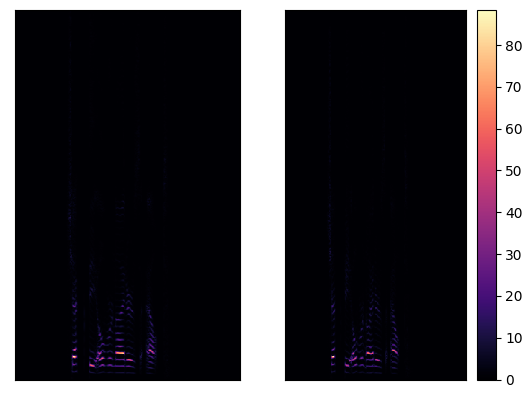

In [52]:
x_stft_hat = librosa.stft(y=x_hat, n_fft=1024, hop_length=256)

plt.subplot(1,2,1)
librosa.display.specshow(x_stft)
plt.subplot(1,2,2)
librosa.display.specshow(x_stft_hat)
plt.colorbar()
